In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Énoncé
Travaillant pour la ville de Seattle,nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie des bâtiments non destinés à l’habitation.

## Mission
Nous allons réaliser dans un premier temps un nettoyage et une courte analyse exploratoire des données de consommation .

## Nettoyage du jeu de données

Lecture du jeu des données de 2015:

In [116]:
df_conso_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

Un aperçu du jeu de données:

In [117]:
df_conso_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


Vérifions s'il existe des doublons sur l'identifiant des bâtiments:

In [118]:
df_conso_2015.duplicated('OSEBuildingID').sum()

0

Sa taille:

In [119]:
print ("Le jeu des données de 2015 compte {} lignes et {} variables".format(df_conso_2015.shape[0], df_conso_2015.shape[1]))

Le jeu des données de 2015 compte 3340 lignes et 47 variables


Lecture du jeu des données de 2016:

In [120]:
df_conso_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

Un aperçu du jeu de données:

In [121]:
df_conso_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Vérifions s'il existe des doublons sur l'identifiant des bâtiments:

In [122]:
df_conso_2016.duplicated('OSEBuildingID').sum()

0

Sa taille:

In [123]:
print ("Le jeu des données de 2016 compte {} lignes et {} variables".format(df_conso_2016.shape[0], df_conso_2016.shape[1]))

Le jeu des données de 2016 compte 3376 lignes et 46 variables


Listons les variables des deux jeux de données:

In [124]:
df_conso_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [125]:
df_conso_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

Définissons une fonction qui détecte les différences entre les variables des deux jeu de données:

In [126]:
def var_non_communes(df1,df2):
    liste=[]
    for i in range( len(df1.columns)):
        if df1.columns[i] not in df2.columns:
            liste.append(df1.columns[i])
    return liste

Analysons les différences des variables dans les deux jeux de données:

In [127]:
liste=var_non_communes(df_conso_2015,df_conso_2016)
print("Les variables présentes dans les données 2015 et absentes dans celles de 2016 sont :")
liste

Les variables présentes dans les données 2015 et absentes dans celles de 2016 sont :


['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

Analysons les différences des variables dans les deux jeux de données:

In [128]:
liste=var_non_communes(df_conso_2016,df_conso_2015)
print("Les variables présentes dans les données 2016 et absentes dans celles de 2015 sont :")
liste

Les variables présentes dans les données 2016 et absentes dans celles de 2015 sont :


['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

###  Variable 'location'

Un aperçu de la variable location:

In [129]:
df_conso_2015['Location'][0]


'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Affichons ces features dans les données de 2016:

In [130]:
df_conso_2016[['Address','City','State','ZipCode','Latitude','Longitude']].head()

,Address,City,State,ZipCode,Latitude,Longitude
0,405 Olive way,Seattle,WA,98101.0,47.61220,-122.33799
1,724 Pine street,Seattle,WA,98101.0,47.61317,-122.33393
2,1900 5th Avenue,Seattle,WA,98101.0,47.61393,-122.33810
3,620 STEWART ST,Seattle,WA,98101.0,47.61412,-122.33664
4,401 LENORA ST,Seattle,WA,98121.0,47.61375,-122.34047


Les informantions contenues dans la variable location  sont présentes dans les données de 2016 sous plusieurs variables.

Nous allons donc séparer les informations contenus dans la variable location:

In [131]:
import ast
df_conso_2015['Location'] = [ast.literal_eval(str(item)) for index, item in df_conso_2015.Location.iteritems()]
df_conso_2015 = pd.concat([df_conso_2015.drop(['Location'], axis=1), df_conso_2015['Location'].apply(pd.Series)], axis=1)
df_conso_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in df_conso_2015.human_address.iteritems()]
df_conso_2015 = pd.concat([df_conso_2015.drop(['human_address'], axis=1), df_conso_2015['human_address'].apply(pd.Series)], axis=1)

Renommons les variables identiques mais sous des formatage différents comme par exemple 'address' et 'Address' :

In [132]:
df_conso_2015 = df_conso_2015.rename(columns={"latitude":"Latitude", 
                                  "longitude":"Longitude",
                                  "address":"Address", 
                                  "city":"City", 
                                  "state":"State", 
                                  "zip":"ZipCode",
                                  "Comment":"Comments"})

Un aperçu du jeu des données de 2015:

In [133]:
df_conso_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


### Variables identiques

Affichons ces features dans les données de 2015:

In [134]:
df_conso_2015[['GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']].head()

,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,249.43,2.64
1,263.51,2.38
2,2061.48,1.92
3,1936.34,31.38
4,507.70,4.02


In [135]:
df_conso_2015[['GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']].describe()

,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3330.000000,3330.000000
mean,110.094102,0.985339
std,409.450179,1.637172
min,0.000000,0.000000
25%,9.265000,0.080000
50%,32.740000,0.460000
75%,88.642500,1.180000
max,11824.890000,31.380000


Affichons ces features dans les données de 2016:

In [136]:
df_conso_2016[['GHGEmissionsIntensity','TotalGHGEmissions']].head()

,GHGEmissionsIntensity,TotalGHGEmissions
0,2.83,249.98
1,2.86,295.86
2,2.19,2089.28
3,4.67,286.43
4,2.88,505.01


In [137]:
df_conso_2016[['GHGEmissionsIntensity','TotalGHGEmissions']].describe()

,GHGEmissionsIntensity,TotalGHGEmissions
count,3367.000000,3367.000000
mean,1.175916,119.723971
std,1.821452,538.832227
min,-0.020000,-0.800000
25%,0.210000,9.495000
50%,0.610000,33.920000
75%,1.370000,93.940000
max,34.090000,16870.980000


Les features 'GHGEmissions(MetricTonsCO2e)' et 'TotalGHGEmissions' sont les même variables mais sous des formatages différents idem pour 'GHGEmissionsIntensity' et 'GHGEmissionsIntensity(kgCO2e/ft2)'.

Nous allons corriger ces erreurs de formattage en renommant ces features:

In [138]:
df_conso_2015 = df_conso_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

### Suppression des variables non communes

Supprimons des variables non communes aux  deux jeux de données et non utiles pour la problématique:

In [139]:
df_conso_2015=df_conso_2015.drop(columns=['OtherFuelUse(kBtu)','2010 Census Tracts',
                                          'Seattle Police Department Micro Community Policing Plan Areas',
                                          'City Council Districts','SPD Beats','Zip Codes'])

### Les types des variables 

Définissons une fonction qui détecte les différences des types de variable dans les deux jeux de données:

In [140]:
def types_non_communes(df1,df2):
    liste=[]
    for col in df1.columns:
        if df1[col].dtypes!= df2[col].dtypes:
            liste.append(col)
    return liste

Analysons les différences des types variables dans les deux jeux de données :

In [141]:
liste=types_non_communes(df_conso_2015,df_conso_2016)
print("Les variables ayant des types différents entre les deux jeux de données sont:")
liste

Les variables ayant des types différents entre les deux jeux de données sont:


['NumberofBuildings',
 'NumberofFloors',
 'DefaultData',
 'Comments',
 'Latitude',
 'Longitude',
 'ZipCode']

Visualissons les types de variables dans les deux de données:

In [142]:
pd.DataFrame([df_conso_2015[liste].dtypes, df_conso_2016[liste].dtypes],index=['2015','2016'])

,NumberofBuildings,NumberofFloors,DefaultData,Comments,Latitude,Longitude,ZipCode
2015,int64,float64,object,object,object,object,object
2016,float64,int64,bool,float64,float64,float64,float64


Mettons les variables aux même types dans les deux jeux de données :

In [143]:
df_conso_2015[['NumberofBuildings','NumberofFloors','Latitude','Longitude','ZipCode']]= \
df_conso_2015[['NumberofBuildings','NumberofFloors','Latitude','Longitude','ZipCode']].astype('float64')
df_conso_2016[['NumberofFloors']]=df_conso_2016[['NumberofFloors']].astype('float64')
df_conso_2016[['Comments','DefaultData']]=df_conso_2016[['Comments','DefaultData']].astype('object')

Recontrollons les types  des variables:

In [144]:
pd.DataFrame([df_conso_2015[liste].dtypes, df_conso_2016[liste].dtypes],index=['2015','2016'])

,NumberofBuildings,NumberofFloors,DefaultData,Comments,Latitude,Longitude,ZipCode
2015,float64,float64,object,object,float64,float64,float64
2016,float64,float64,object,object,float64,float64,float64


### Fusion des deux jeux de données

Fusionnons les deux jeux de données:

In [145]:
df_conso_fusion=pd.concat([df_conso_2015, df_conso_2016],axis = 0)

Un aperçu du nouveau jeu de données:

In [146]:
df_conso_fusion.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,No,NaN,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,No,NaN,Compliant,NaN,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,Yes,NaN,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,No,NaN,Compliant,High Outlier,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA,98101.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,No,NaN,Compliant,NaN,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA,98121.0


Sa taille:

In [147]:
print ("Le nouveau jeu de données compte {} lignes et {} variables".format(df_conso_fusion.shape[0], df_conso_fusion.shape[1]))

Le nouveau jeu de données compte 6716 lignes et 46 variables


### Suppression des bâtiments destinés à l’habitation

Notre problematique consiste à prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation, nous allons donc supprimer les bâtiments destinés à l’habitation.

Visualisons les types de bâtiments:

In [148]:
df_conso_fusion['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Eliminons les bâtiments destinés à l’habitation:

In [149]:
mask=~df_conso_fusion['BuildingType'].str.contains("Multifamily")
df_conso_fusion = df_conso_fusion[mask]

Recontrollons les types de bâtiments du jeu de données:

In [150]:
df_conso_fusion['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

Sa nouvelle taille:

In [151]:
print ("Le jeu de données compte {} lignes et {} variables".format(df_conso_fusion.shape[0], df_conso_fusion.shape[1]))

Le jeu de données compte 3318 lignes et 46 variables


### Variables redondantes

Les variables SiteEUI(kBtu/sf) et SiteEUIWN(kBtu/sf) sont des variables redondantes car le terme 'WN' est juste une correction liée aux conditions atmosphériques.
Idem pour les variables SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf) ,SiteEnergyUse(kBtu) et SiteEnergyUseWN(kBtu).

Les variables Electricity(kWh) et Electricity(kBtu), NaturalGas(therms) et NaturalGas(kBtu) sont les mêmes données mais exprimées en des unités differentes.

Eliminons ces valeurs redondantes:

In [152]:
df_conso_fusion=df_conso_fusion.drop(columns=['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)',
                                'Electricity(kWh)','NaturalGas(therms)'])

### Traitement des valeurs aberrantes

In [153]:
df_conso_aberr=df_conso_fusion.copy()

Listons les features numeriques:

In [154]:
df_conso_aberr_num=df_conso_aberr.select_dtypes(include = ['float64', 'int64'])
df_conso_aberr_num.columns

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Latitude', 'Longitude', 'ZipCode'],
      dtype='object')

Analysons ces features:

In [155]:
df_conso_aberr[['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA
count,3318.000000,3318.000000,3318.000000,3318.000000,3316.000000,3310.000000,3.318000e+03,3318.000000,3.318000e+03,3.247000e+03,1667.000000
mean,15951.816154,2015.502712,4.365883,1961.536769,1.117310,4.126888,1.156672e+05,13303.304702,1.023639e+05,9.539352e+04,36144.703237
std,13411.897096,0.500068,2.195304,32.709772,2.219845,6.567333,2.511222e+05,43596.620504,2.340749e+05,2.274274e+05,68243.536838
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,-2.000000,-5.055000e+04,5.656000e+03,0.000000
25%,579.000000,2015.000000,2.000000,1930.000000,1.000000,1.000000,2.951225e+04,0.000000,2.850775e+04,2.550000e+04,5400.000000
50%,21122.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.924600e+04,0.000000,4.736800e+04,4.320000e+04,12102.000000
75%,24556.750000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.047860e+05,0.000000,9.447150e+04,9.000000e+04,31190.500000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000


In [156]:
df_conso_aberr[['ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude', 'ZipCode']].describe()

,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,ZipCode
count,2211.000000,3308.000000,3309.000000,3.309000e+03,3.309000e+03,3.309000e+03,3.309000e+03,3309.000000,3309.000000,3318.000000,3318.000000,3302.000000
mean,64.815920,71.608343,175.440012,8.068625e+06,4.934034e+05,5.636556e+06,1.876485e+06,177.038779,1.479716,47.616006,-122.333051,98116.579952
std,28.549886,72.372179,180.787065,2.525462e+07,5.226678e+06,1.740900e+07,7.898387e+06,666.442480,2.214812,0.048102,0.024535,17.071800
min,1.000000,0.000000,-2.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000,47.499170,-122.411820,98006.000000
25%,47.000000,33.200001,76.200000,1.223425e+06,0.000000e+00,7.236670e+05,0.000000e+00,19.720000,0.270000,47.585595,-122.343357,98104.000000
50%,72.000000,51.700000,131.300003,2.505271e+06,0.000000e+00,1.623657e+06,4.797690e+05,49.160000,0.780000,47.612313,-122.333019,98109.000000
75%,89.000000,81.699997,204.899994,6.917280e+06,0.000000e+00,4.878886e+06,1.471375e+06,138.870000,1.760000,47.649156,-122.321825,98122.000000
max,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000,47.733870,-122.258640,98199.000000


Les valeurs aberrantes seront celles ayant des valeurs negatives.Nous décidons de transformer ces aberrantes en valeurs manquantes:

Listons ces features:

In [157]:
liste=['PropertyGFAParking','PropertyGFABuilding(s)','SourceEUI(kBtu/sf)','Electricity(kBtu)','TotalGHGEmissions',
       'GHGEmissionsIntensity']
liste

['PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SourceEUI(kBtu/sf)',
 'Electricity(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

Définissons une fonction qui transforme les valeurs aberrantes en manquantes:

In [158]:
def valeurs_aber_neg(df,liste):
    for i in liste:
        mask=df[i]<0
        df.loc[mask,i]=np.NaN
    return df

Transformons les valeurs aberrantes en manquantes:

In [159]:
df_conso_aberr=valeurs_aber_neg(df_conso_aberr,liste)

Réanalysons ces features:

In [160]:
df_conso_aberr[liste].describe()

,PropertyGFAParking,PropertyGFABuilding(s),SourceEUI(kBtu/sf),Electricity(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3317.000000,3.316000e+03,3308.000000,3.308000e+03,3308.000000,3308.000000
mean,13307.315948,1.024539e+05,175.493652,5.638294e+06,177.092539,1.480169
std,43602.581304,2.341167e+05,180.788060,1.741135e+07,666.536058,2.214993
min,0.000000,3.636000e+03,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,2.853100e+04,76.275000,7.243368e+05,19.727500,0.270000
50%,0.000000,4.739150e+04,131.349998,1.624486e+06,49.165000,0.780000
75%,0.000000,9.447200e+04,204.999996,4.878943e+06,138.892500,1.760000
max,512608.000000,9.320156e+06,2620.000000,6.570744e+08,16870.980000,34.090000


D'autre part le nombre de bâtiments et étages NumberofBuildings et NumberofFloors ne peuvent pas être égal 0,les valeurs remplissant cette condition seront considérées aberrantes transformer en valeurs  manquantes:

Définissons une fonction qui transforme  ce types de valeurs aberrantes en manquantes

In [161]:
def valeurs_aber_null(df,liste):
    for i in liste:
        mask=df[i]== 0
        df.loc[mask,i]=np.NaN
    return df

Transformons les valeurs aberrantes en manquantes:

In [162]:
df_conso_aberr=valeurs_aber_null(df_conso_aberr,['NumberofBuildings','NumberofFloors'])

Réanalysons ces features:

In [163]:
df_conso_aberr[['NumberofBuildings','NumberofFloors']].describe()

,NumberofBuildings,NumberofFloors
count,3264.000000,3289.000000
mean,1.135110,4.153238
std,2.232942,6.579959
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,4.000000
max,111.000000,99.000000


### Traitement des valeurs manquantes

In [164]:
df_conso_cleaned=df_conso_aberr.copy()

Affichons le taux de remplissage des features:

In [165]:
df_nan=df_conso_cleaned.isna().sum().sort_values(ascending=False)
df_nan

Comments                           3306
Outlier                            3270
YearsENERGYSTARCertified           3130
ThirdLargestPropertyUseTypeGFA     2634
ThirdLargestPropertyUseType        2634
SecondLargestPropertyUseTypeGFA    1651
SecondLargestPropertyUseType       1651
ENERGYSTARScore                    1107
LargestPropertyUseTypeGFA            71
LargestPropertyUseType               71
ListOfAllPropertyUseTypes            63
NumberofBuildings                    54
NumberofFloors                       29
ZipCode                              16
Electricity(kBtu)                    10
SiteEUI(kBtu/sf)                     10
GHGEmissionsIntensity                10
TotalGHGEmissions                    10
SourceEUI(kBtu/sf)                   10
NaturalGas(kBtu)                      9
SteamUse(kBtu)                        9
SiteEnergyUse(kBtu)                   9
PropertyGFABuilding(s)                2
PropertyGFAParking                    1
DefaultData                           1


Il en découle le graphe suivant:

<AxesSubplot:title={'center':'Taux de valeurs manquantes du jeu de données (%)'}>

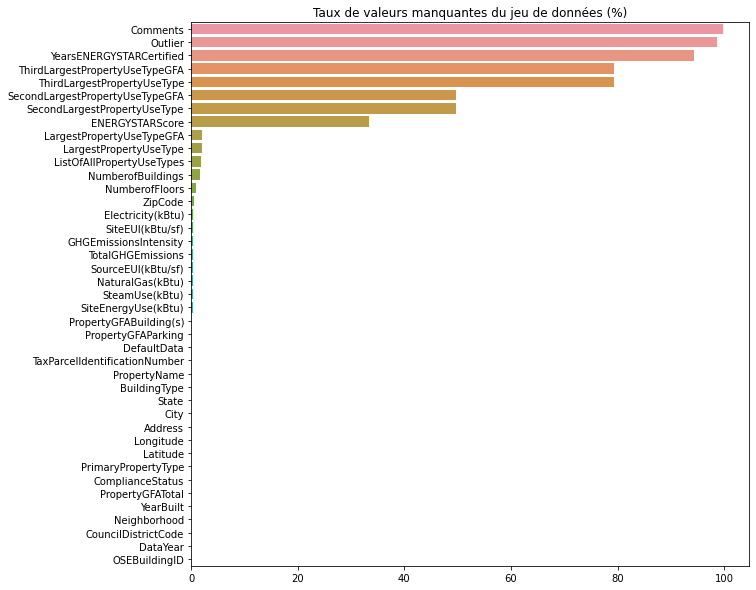

In [166]:
plt.figure(figsize=(10,10))
plt.title('Taux de valeurs manquantes du jeu de données (%)')
sns.barplot(x=df_nan.values/df_conso_cleaned.shape[0]*100, y=df_nan.index)

#### Suppression des features ayant un taux élevé de valeurs manquantes

Définissons une fonction qui calcule de taux de valeurs manquantes des features:

In [167]:
def null_factor(df, tx):
    null_rate = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
    null_rate.columns = ['Variable','Taux_de_Null']
    high_null_rate = null_rate[null_rate.Taux_de_Null >= tx]
    return high_null_rate

Affichons les variables ayant les plus haut taux de valeurs manquantes:

In [168]:
full_null_rate = null_factor(df_conso_cleaned, 80)
full_null_rate

,Variable,Taux_de_Null
0,Comments,99.638336
1,Outlier,98.553345
2,YearsENERGYSTARCertified,94.333936


Eliminons les features ayant plus de 80% de NaN:

In [169]:
df_conso_cleaned=df_conso_cleaned.drop(columns=['Comments','Outlier','YearsENERGYSTARCertified'])

Eliminons des lignes comportant que des NaN:

In [170]:
df_conso_cleaned.dropna(how = 'all', axis=0, inplace=True)

#### Imputation des valeurs manquantes par 0

La plus part des secondes utlisations des bâtiments ont une superfie de 0, nous allons imputer les valeurs manquantes par zéro. Nous décidons également d'imputer les features liées à la consommation d'énergie par zéro.

Listons ces variables:

In [171]:
liste_nan_to_zero=['SecondLargestPropertyUseTypeGFA','ENERGYSTARScore','ThirdLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)','PropertyGFAParking','ZipCode',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',
       'TotalGHGEmissions', 'GHGEmissionsIntensity']

Imputons les valeurs manquantes:

In [172]:
df_conso_cleaned[liste_nan_to_zero] = df_conso_cleaned[liste_nan_to_zero].fillna(0)

#### Imputation par unknown

Nous décidons d'imputer les valeurs manquantes des features catégorielles par unknown:

Listons ces variables:

In [173]:
liste_nan_to_unknown=['TaxParcelIdentificationNumber','ListOfAllPropertyUseTypes','LargestPropertyUseType',
           'SecondLargestPropertyUseType','ThirdLargestPropertyUseType','DefaultData']
liste_nan_to_unknown

['TaxParcelIdentificationNumber',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'DefaultData']

Imputons les valeurs manquantes:

In [174]:
df_conso_cleaned[liste_nan_to_unknown] = df_conso_cleaned[liste_nan_to_unknown].fillna('unknown')

#### Imputations par la valeur la plus fréquente

Nous imputons les valeurs manquantes de nombre de bâtiments et d'étages par la valeur la plus fréquente:

Listons ces variables:

In [175]:
liste_nan_to_mode=['NumberofFloors','NumberofBuildings']
liste_nan_to_mode

['NumberofFloors', 'NumberofBuildings']

Définissons une founction qui impute les valeurs manquantes par la mode:

In [176]:
def nan_to_mode(df, liste):
    for col in liste:
        df[col]=df[col].fillna(df[col].mode()[0])
    return df

Imputons les valeurs manquantes:

In [177]:
df_conso_cleaned=nan_to_mode(df_conso_cleaned, liste_nan_to_mode)

Recontrollons les valeurs manquantes:

In [178]:
df_conso_cleaned.isna().sum()

OSEBuildingID                      0
DataYear                           0
BuildingType                       0
PrimaryPropertyType                0
PropertyName                       0
TaxParcelIdentificationNumber      0
CouncilDistrictCode                0
Neighborhood                       0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
ListOfAllPropertyUseTypes          0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseType        0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUI(kBtu/sf)                   0
SourceEUI(kBtu/sf)                 0
SiteEnergyUse(kBtu)                0
SteamUse(kBtu)                     0
Electricity(kBtu)                  0
N

#### Catégorisation des features

Transformons les types de features en catégories:

Listons ces variables:

In [179]:
liste_to_categorize = ['BuildingType', 'CouncilDistrictCode',
                        'ComplianceStatus', 'Neighborhood']
liste_to_categorize

['BuildingType', 'CouncilDistrictCode', 'ComplianceStatus', 'Neighborhood']

Catégorisons nos features:

In [180]:
df_conso_cleaned[liste_to_categorize] = df_conso_cleaned[liste_to_categorize].astype('category')

Affichons les features par catégories:

In [181]:
df_conso_cleaned.select_dtypes(['object', 'category']).nunique().sort_values(ascending=False)

PropertyName                     3204
Address                          3117
TaxParcelIdentificationNumber    1836
ListOfAllPropertyUseTypes         388
LargestPropertyUseType             58
SecondLargestPropertyUseType       48
ThirdLargestPropertyUseType        41
PrimaryPropertyType                30
Neighborhood                       19
CouncilDistrictCode                 7
BuildingType                        5
DefaultData                         5
ComplianceStatus                    4
City                                2
State                               1
dtype: int64

#### Regroupement par catégories

Listons catégories d'utlisation des bâtiments:

In [182]:
liste_property_use_types = ['LargestPropertyUseType',
                              'PrimaryPropertyType',
                              'SecondLargestPropertyUseType',
                              'ThirdLargestPropertyUseType']
liste_property_use_types

['LargestPropertyUseType',
 'PrimaryPropertyType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

Listons les utlisations des bâtiments:

In [183]:
df_conso_cleaned['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'unknown', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Retail Store', 'Senior Care Community',
       'Medical Office', 'Hospital (General Medical & Surgical)',
       'Museum', 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Other - Recreation', 'Lifestyle Center',
       'Other - Pu

In [184]:
df_conso_cleaned['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'Restaurant\n', 'Low-Rise Multifamily',
       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

In [185]:
df_conso_cleaned['SecondLargestPropertyUseType'].unique()

array(['unknown', 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Laboratory', 'Movie Theater', 'Supermarket/Grocery Store',
       'Medical Office', 'Other - Recreation',
       'Convenience Store without Gas Station',
       'Fitness Center/Health Club/Gym', 'Performing Arts',
       'College/University', 'Other - Restaurant/Bar', 'Adult Education',
       'Multifamily Housing', 'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Bank Branch',
       'Refrigerated Warehouse', 'Hotel', 'Food Sales',
       'Other - Public Services', 'Food Service', 'Worship Facility',
       'Manufactu

In [186]:
df_conso_cleaned['ThirdLargestPropertyUseType'].unique()

array(['unknown', 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly', 'Other',
       'Distribution Center', 'Food Service', 'Other - Services',
       'Medical Office', 'Parking', 'K-12 School',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Pre-school/Daycare', 'Convenience Store without Gas Station',
       'Financial Office', 'Non-Refrigerated Warehouse',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Other - Recreation',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Self-Storage Facility', 'Other - Technology/Science',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Bar/Nightclub', 'Other/Specialty Hospital',
       'Fast Food Restaurant', 'Worship Facility',
       'Supermarket/Grocery Store', 'Enclosed Mall', 'Other - Utility',
       'Strip Mall', 'Vocat

Créons un dictionnaire pour regrouper les utilisations de bâtiments:

In [187]:
usetype_dict = {'Retail Store' : 'Retail',
                'Supermarket/Grocery Store' : 'Retail',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
                'Automobile Dealership': 'Retail',
                'Convenience Store without Gas Station': 'Retail',
                'Personal Services': 'Retail',
                'Enclosed Mall': 'Retail',
                'Strip Mall': 'Retail',
                'Wholesale Club/Supercenter': 'Retail',
                'Other - Mall': 'Retail',
                'Supermarket / Grocery Stor': 'Retail',
                'Automobile Dealership':'Retail',
                
                'Food Sales' : 'Recreation',
                'Restaurant' : 'Recreation',
                'Other - Restaurant/Bar' : 'Recreation',
                'Food Service': 'Recreation' ,
                'Worship Facility': 'Recreation',
                'Other - Recreation': 'Recreation',
                'Other - Entertainment/Public Assembly': 'Recreation',
                'Performing Arts': 'Recreation',
                'Bar/Nightclub': 'Recreation',
                'Movie Theater': 'Recreation',
                'Museum': 'Recreation',
                'Social/Meeting Hall': 'Recreation',
                'Fitness Center/Health Club/Gym': 'Recreation',
                'Lifestyle Center': 'Recreation',
                'Fast Food Restaurant': 'Recreation',
                'Convention Center': 'Recreation',
                
                'Multifamily Housing' : 'Hotel/Senior Care/Housing',
                'Other - Lodging/Residential': 'Hotel/Senior Care/Housing',
                'Residence Hall/Dormitory': 'Hotel/Senior Care/Housing',
                'Hotel' : 'Hotel/Senior Care/Housing',
                'Senior Care Community' : 'Hotel/Senior Care/Housing',
                'Residential Care Facility' : 'Hotel/Senior Care/Housing',
                'High-Rise Multifamily': 'Hotel/Senior Care/Housing',
                
                'Medical Office' : 'Health',
                'Hospital (General Medical & Surgical)':'Health',
                'Other/Specialty Hospital':'Health',
                'Hospital':'Health',
                'Personal Services (Health/Beauty, Dry Cleaning, etc)':'Health',
                'Outpatient Rehabilitation/Physical Therapy':'Health',
                
                'Other - Services' : 'Office',
                'Bank Branch' : 'Office',
                'Large Office':'Office',
                'Courthouse':'Office',
                'Police Station':'Office',
                'Self-Storage Facility':'Office',
                'Financial Office' : 'Office',
                'Other - Public Services': 'Office',
                'Fire Station': 'Office',
                
                'Prison/Incarceration': 'prison',

                'K-12 School' : 'Education',
                'Other - Education': 'Education',
                'Vocational School' : 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'University': 'Education',
                'College/University': 'Education',
                'Library': 'Education'
               }

Regroupons les utilisations des bâtiments par catégories:

In [188]:
for col in liste_property_use_types:
    df_conso_cleaned[col] = df_conso_cleaned[col].replace(usetype_dict)

Visualissons les utilisations des bâtiments par catégories:

In [189]:
for col in df_conso_cleaned[liste_property_use_types].columns:
    print(df_conso_cleaned[col].value_counts())
    print('\n')

Office                                 1064
Non-Refrigerated Warehouse              393
Education                               343
Retail                                  320
Recreation                              317
Hotel/Senior Care/Housing               256
Other                                   198
Health                                  114
Distribution Center                     106
unknown                                  71
Parking                                  56
Refrigerated Warehouse                   24
Laboratory                               22
Manufacturing/Industrial Plant           14
Urgent Care/Clinic/Other Outpatient       8
Data Center                               5
Other - Utility                           4
prison                                    3
Name: LargestPropertyUseType, dtype: int64


Small- and Mid-Sized Office    588
Other                          502
Office                         376
Education                      320
Retail                 

Eliminons les \n contenus dans certaines utilisations des bâtiments:

In [190]:
df_conso_cleaned['PrimaryPropertyType'] = df_conso_cleaned['PrimaryPropertyType'].str.replace('\n','')

Visualissons les utilisations des bâtiments par catégories:

In [191]:
for col in df_conso_cleaned[liste_property_use_types].columns:
    print(df_conso_cleaned[col].name, ':')
    print(df_conso_cleaned[col].value_counts(),'\n')

LargestPropertyUseType :
Office                                 1064
Non-Refrigerated Warehouse              393
Education                               343
Retail                                  320
Recreation                              317
Hotel/Senior Care/Housing               256
Other                                   198
Health                                  114
Distribution Center                     106
unknown                                  71
Parking                                  56
Refrigerated Warehouse                   24
Laboratory                               22
Manufacturing/Industrial Plant           14
Urgent Care/Clinic/Other Outpatient       8
Data Center                               5
Other - Utility                           4
prison                                    3
Name: LargestPropertyUseType, dtype: int64 

PrimaryPropertyType :
Small- and Mid-Sized Office    588
Other                          502
Office                         376
Education  

## Exploration du jeu de données

In [192]:
df_conso_explo=df_conso_cleaned.copy()

Réindexation du jeu de données:

In [193]:
df_conso_explo=df_conso_explo.reset_index(drop = True)

### Analyse uni-variée

#### SiteEnergyUse(kBtu)

Visualissons la quantité annuelle d'énergie consommée par la propriété entre 2015 et 2016:

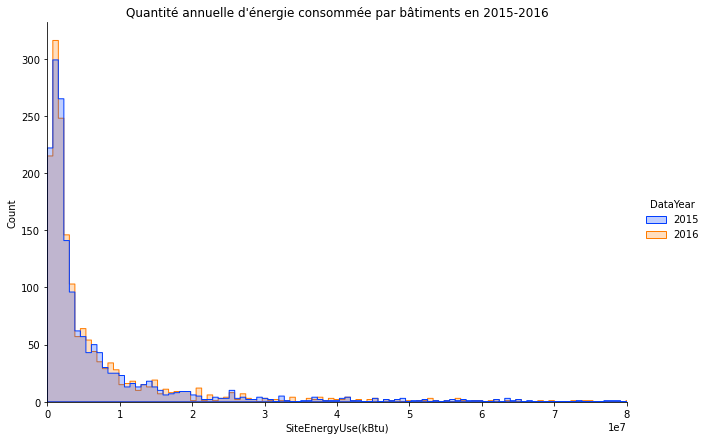

In [194]:
fig=sns.displot(data=df_conso_explo, x="SiteEnergyUse(kBtu)", hue="DataYear",element="step",
                 palette='bright', height=6, aspect=1.5)
fig.set(title="Quantité annuelle d'énergie consommée par bâtiments en 2015-2016")
xlim=plt.xlim(0,0.8e8)

La consommation d'energie par bâtiments a légèrement augmentée en 2016.

#### TotalGHGEmissions 

Analysons les variations des emissions de cos entre 2015 et 2016:

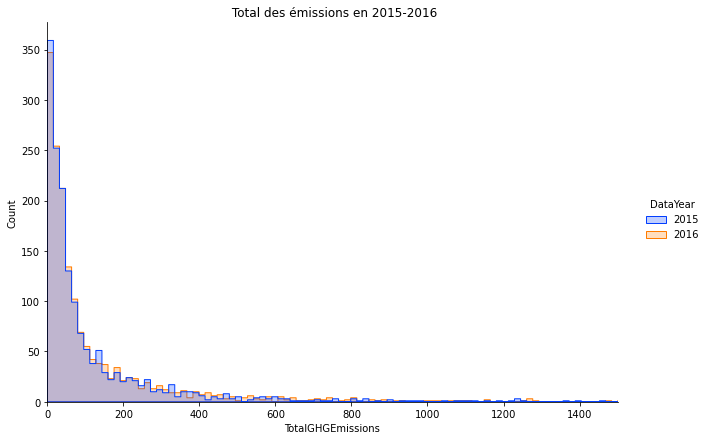

In [195]:
fig=sns.displot(data=df_conso_explo, x="TotalGHGEmissions", hue="DataYear",element="step",
                 palette='bright', height=6, aspect=1.5)
title=fig.set(title=" Total des émissions en 2015-2016")
xlim=plt.xlim(0,1500)

Les emissions de CO2 entre ces deux années sont plus ou moins homogénes avec toute une légere amélioration des scores en 2016.

#### BuildingType

Visualisons la répartition des bâtiments par catégories:

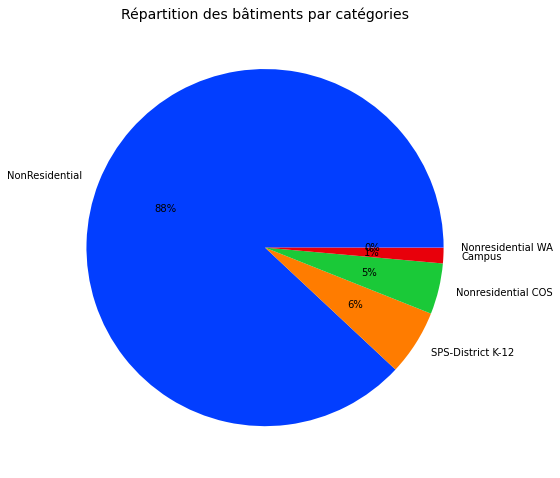

In [196]:
comptage_type_building = df_conso_explo['BuildingType'].value_counts()
colors = sns.color_palette('bright')
plt.figure(figsize=(8, 10))
plt.pie(comptage_type_building.values, labels=comptage_type_building.index,colors = colors, autopct = '%0.0f%%')
title=plt.title("Répartition des bâtiments par catégories" , fontsize=14)

Les bâtiments de type NonResidential sont de loin les plus representés.

#### PrimaryPropertyType

Visualisons les utilisations principales des bâtiments:

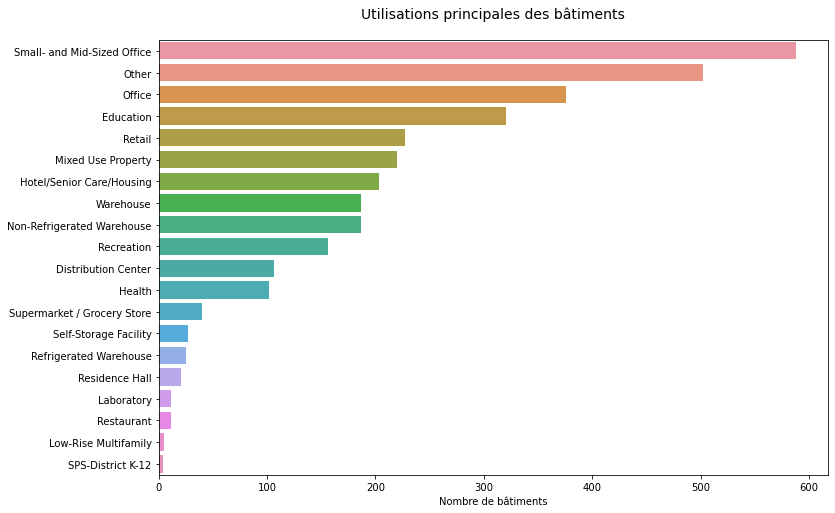

In [197]:
comptage_type_categories = df_conso_explo['PrimaryPropertyType'].value_counts()
plt.figure(figsize=(12,8))
ax=sns.barplot(x=comptage_type_categories.values,y=comptage_type_categories .index)
ax.set_xlabel("Nombre de bâtiments")
title=plt.title("Utilisations principales des bâtiments" "\n", fontsize=14)

Les bureaux sont la principale utilisation des bâtiments

#### YearBuilt

L'année de construction ne nous semble pas pertinent pour l'analyse, il serait plus intéressant de traiter l'âge des bâtiments pour réduire la dispersion des données et lier l'année des relevés. Nous allons donc créer cette nouvelle variable et supprimer l'année de construction :

In [198]:
df_conso_explo['BuildingAge'] = df_conso_explo['DataYear'] - df_conso_explo['YearBuilt']
df_conso_explo.drop('YearBuilt', axis=1, inplace=True)

Affichons le nombre de bâtiments par âge:

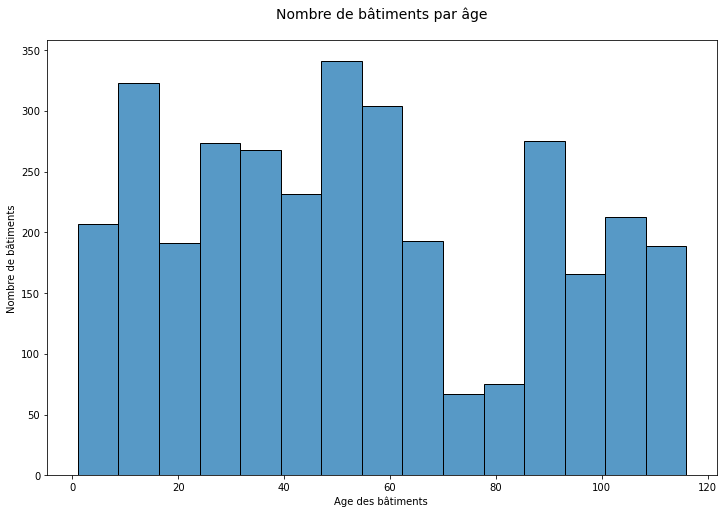

In [199]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df_conso_explo, x='BuildingAge' )
ax.set_xlabel("Age des bâtiments ")
ax.set_ylabel("Nombre de bâtiments")
title=plt.title(f"Nombre de bâtiments par âge\n", fontsize=14)

### Analyse bi-variée

#### Features numériques

Réalisons une analyse de la corrélation linéaire entre les variables quantitatives:

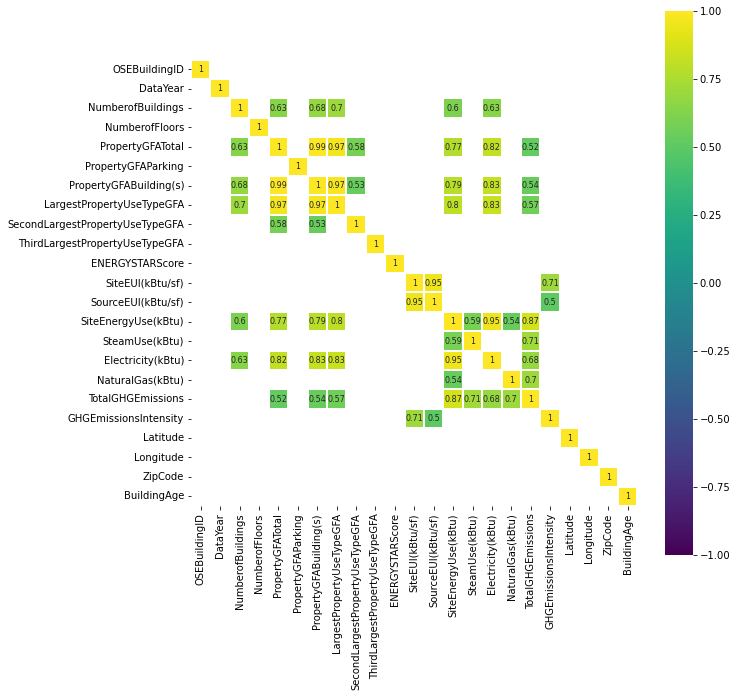

In [200]:
corr = df_conso_explo.select_dtypes(include = ['float64', 'int64']).corr() 
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

  Affichons les paires de variables ayant un coefficient de corrélation de Pearson supérieur à 0.7 :

In [201]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
28,PropertyGFATotal,PropertyGFABuilding(s),0.986334
26,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),0.971606
24,LargestPropertyUseTypeGFA,PropertyGFATotal,0.966365
22,SiteEnergyUse(kBtu),Electricity(kBtu),0.951415
20,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.951176
18,SiteEnergyUse(kBtu),TotalGHGEmissions,0.865495
16,LargestPropertyUseTypeGFA,Electricity(kBtu),0.831161
14,PropertyGFABuilding(s),Electricity(kBtu),0.825201
12,PropertyGFATotal,Electricity(kBtu),0.815411
10,SiteEnergyUse(kBtu),LargestPropertyUseTypeGFA,0.802979


Nous observons de fortes corrélations  entre :

- PropertyGFATotal et PropertyGFABuilding(s) / LargestPropertyUseTypeGFA
- PropertyGBABuilding(s) et LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu) et Electricity(kBtu)	
- SiteEUI(kBtu/sf) et SourceEUI(kBtu/sf)	
- TotalGHEmissions et SiteEnergyUse(kBtu)

Les variables de consommation d'énergie sont corrélées linéarement en géneral entre elles et aussi aux principales utilisations et surfaces des bâtiments.

On peut observer que les variables suffixées GFA présentent de fortes corrélations avec plusieurs autres variables. Nous allons donc créer de nouvelles variables pour tenter de gommer ces corrélations linéaires :

In [202]:
df_conso_explo['GFAParkingRatio'] = df_conso_explo['PropertyGFAParking']/df_conso_explo['PropertyGFATotal']
df_conso_explo['GFABuildingRatio'] = df_conso_explo['PropertyGFABuilding(s)']/df_conso_explo['PropertyGFATotal']


Supprimons les features suffixées GFA non utiles:

In [203]:
df_conso_explo.drop(['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
         'ThirdLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

Vérifions l'impact de ces feature engineering sur la matrice des corrélations linéaires :

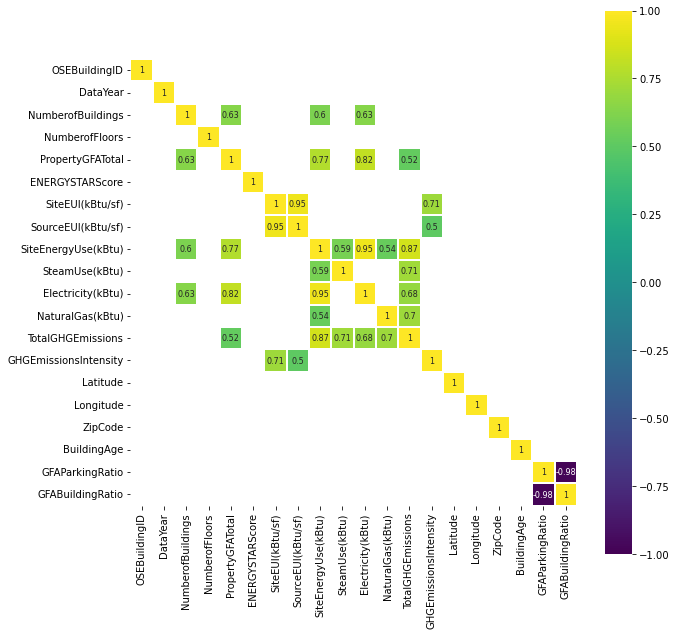

In [204]:
corr = df_conso_explo.select_dtypes(include = ['float64', 'int64']).corr() 
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [205]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
16,SiteEnergyUse(kBtu),Electricity(kBtu),0.951415
14,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.951176
12,SiteEnergyUse(kBtu),TotalGHGEmissions,0.865495
10,Electricity(kBtu),PropertyGFATotal,0.815411
8,SiteEnergyUse(kBtu),PropertyGFATotal,0.767481
6,SteamUse(kBtu),TotalGHGEmissions,0.714093
4,GHGEmissionsIntensity,SiteEUI(kBtu/sf),0.707848
2,NaturalGas(kBtu),TotalGHGEmissions,0.704192
0,GFAParkingRatio,GFABuildingRatio,-0.980292


#### SiteEnergyUse(kBtu)  & BuildingType

Analysons la consommation d'énergie par type d'habitations:

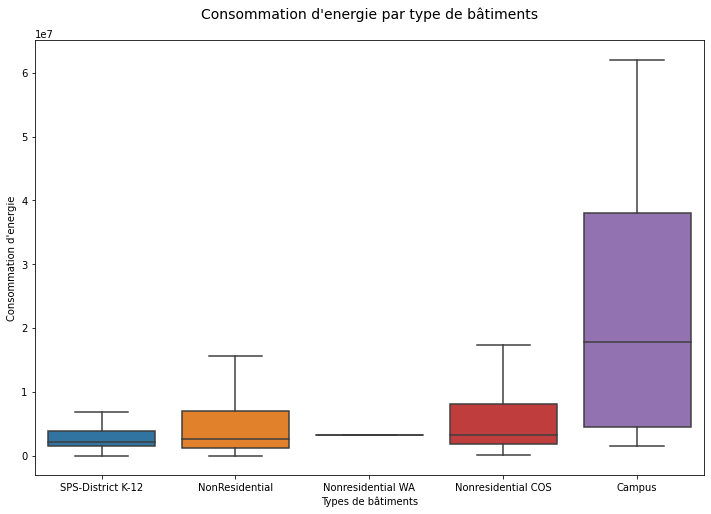

In [206]:
ordre_energy = df_conso_explo.groupby('BuildingType')['SiteEnergyUse(kBtu)'].median().sort_values().index
plt.figure(figsize=(12,8))
ax=sns.boxplot(x="BuildingType", y="SiteEnergyUse(kBtu)", showfliers=False,order=ordre_energy , 
            data=df_conso_explo)
ax.set_xlabel("Types de bâtiments")
ax.set_ylabel("Consommation d'energie")
title=plt.title("Consommation d'energie par type de bâtiments" "\n", fontsize=14)


Les campus en moyenne ont la plus grande consommation d'énergie.

#### SiteEnergyUse(kBtu) & Neighborhood

Afin de gommer les erreurs de formatage sur les noms des quartiers, nous mettons ces derniers en miniscule:

In [207]:
df_conso_explo['Neighborhood']= df_conso_explo['Neighborhood'].str.lower()

Analysons la consommation d'énergie par quartier:

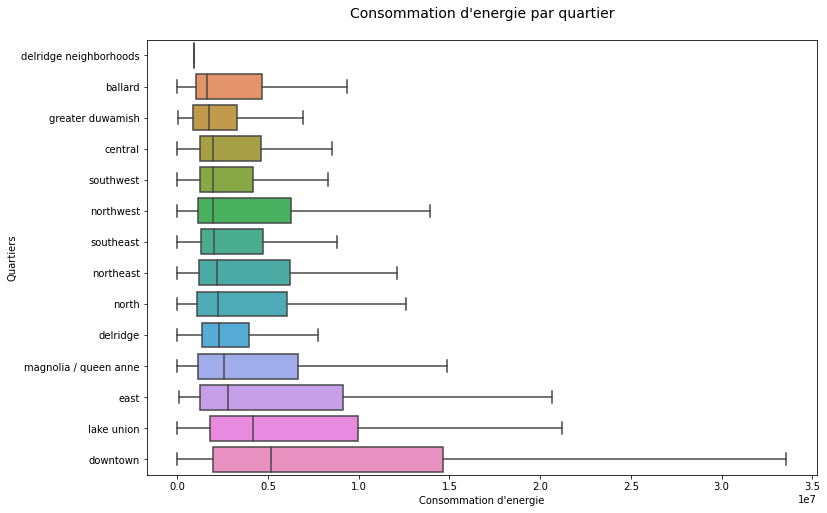

In [208]:
ordre_energy = df_conso_explo.groupby('Neighborhood')['SiteEnergyUse(kBtu)'].median().sort_values().index
plt.figure(figsize=(12,8))
ax=sns.boxplot(x="SiteEnergyUse(kBtu)", y="Neighborhood", showfliers=False,order=ordre_energy , 
            data=df_conso_explo)
ax.set_xlabel("Consommation d'energie")
ax.set_ylabel("Quartiers")
title=plt.title("Consommation d'energie par quartier" "\n", fontsize=14)

La consommation d'energie est la plus importante au centre ville.

#### SiteEnergyUse(kBtu)& PrimaryPropertyType

Analysons la consommation d'énergie dans la principale utilisation des bâtiments:

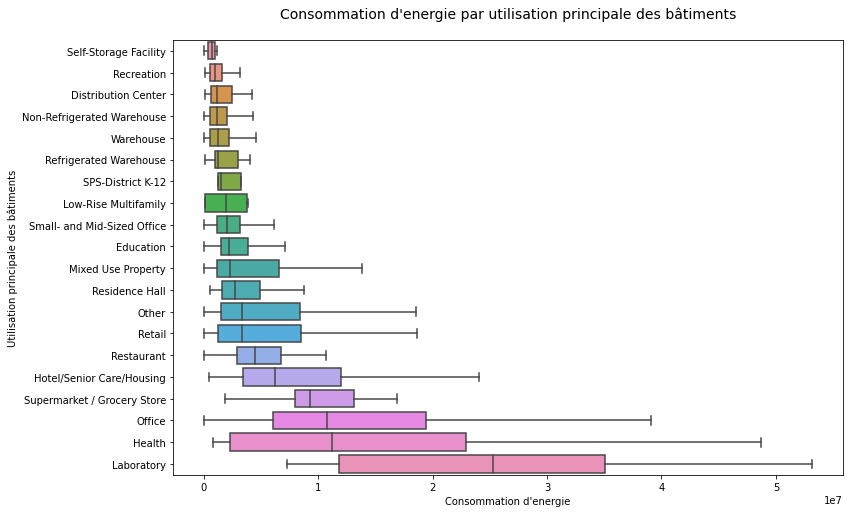

In [209]:
ordre_energy = df_conso_explo.groupby('PrimaryPropertyType')['SiteEnergyUse(kBtu)'].median().sort_values().index
plt.figure(figsize=(12,8))
ax=sns.boxplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", showfliers=False,order=ordre_energy , 
            data=df_conso_explo)
ax.set_xlabel("Consommation d'energie")
ax.set_ylabel("Utilisation principale des bâtiments")
title=plt.title("Consommation d'energie par utilisation principale des bâtiments" "\n", fontsize=14)

Les laboratoires,les etablissements de santé et les bureaux sont les lieux à plus forte consommation d'énergie en moyenne.

### Données pour la prédiction 

In [210]:
df_conso_pred=df_conso_explo.copy()

La taile du jeu de données est:

In [211]:
print ("Le jeu de données compte à présent {} lignes et {} variables".format(df_conso_pred.shape[0], df_conso_pred.shape[1]))

Le jeu de données compte à présent 3318 lignes et 33 variables


Les colonnes restantes sont:

In [212]:
df_conso_pred.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'DefaultData', 'ComplianceStatus', 'Latitude',
       'Longitude', 'Address', 'City', 'State', 'ZipCode', 'BuildingAge',
       'GFAParkingRatio', 'GFABuildingRatio'],
      dtype='object')

Eliminons les features non pas utiles à notre problématique:

In [213]:
liste_drop=['OSEBuildingID', 'DataYear','PropertyName', 'TaxParcelIdentificationNumber','DefaultData','CouncilDistrictCode',
            'ListOfAllPropertyUseTypes', 'ComplianceStatus','Latitude', 'Longitude','Address','City', 'State','ZipCode']

In [214]:
df_conso_pred=df_conso_pred.drop(columns=liste_drop)

Eliminons aussi les features liées à la consommation d'énergie car le but de notre travail est leur prediction:

In [215]:
liste_conso=['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)',
            'GHGEmissionsIntensity']

In [216]:
df_conso_pred=df_conso_pred.drop(columns=liste_conso)

La nouvelle taille est:

In [217]:
print ("Le jeu de données compte à présent {} lignes et {} variables".format(df_conso_pred.shape[0], df_conso_pred.shape[1]))

Le jeu de données compte à présent 3318 lignes et 13 variables


Les features retenues sont:

In [218]:
fea_pred=df_conso_pred.columns
fea_pred

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'BuildingAge', 'GFAParkingRatio',
       'GFABuildingRatio'],
      dtype='object')

#### Separation des données

Séparons les données:

In [219]:
X =  df_conso_pred.drop(columns=['TotalGHGEmissions','SiteEnergyUse(kBtu)'])
Y =  df_conso_pred[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

Créons un file csv pour la partie prediction des données:

In [220]:
X.to_csv('X.csv',index = False)
Y.to_csv('Y.csv',index = False)